# Análise ABC do estoque

Cria análises ABC por quantidade e valor em estoque e por quantidade expedida (movimento 601) em um determinado período

Criar uma função para gravar todo histórico (dataframes gerados, lista e gráficos) em uma pasta espeícica para análise posterior.

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Definindo os arquivos que serão utilizados

In [157]:
arquivo_mon = 'mon_04_06.xlsx'
arquivo_mb52 = 'mb52_04_06.xlsx'
#arquivo_mb51 = '' # movimento 601 de 1 mês


In [158]:
# Para gerar uma pastas com os dados gravados, trocar o valor da variável gravacao para True

# Cria uma função gravar que pega os dados e faz o processo quanto solicitado

gravacao = False

if gravacao == True:
    import os
    from datetime import datetime

    nova_pasta = 'dados/análises/análise_abc_'+datetime.now().strftime("%d-%m-%Y_%Hh%m")
    arquivo_estoque = 'dados/'+arquivo_mon
    arquivo_mb = 'dados/'+arquivo_mb52
    

    if not os.path.exists(nova_pasta): # se a pasta não existir
        os.makedirs(nova_pasta) # cria a pasta
        destino = nova_pasta+'/'+arquivo_mon
        os.replace(arquivo_estoque,destino) # move o arquivo mon para a pasta criada
        destino = nova_pasta+'/'+arquivo_mb52
        os.replace(arquivo_mb, destino) # move o arquivo mb52 para a pasta criada
        del destino
    del arquivo_mb, arquivo_estoque



In [159]:
if gravacao == True:
    estoque = pd.read_excel(nova_pasta+'/'+arquivo_mon)
    mb52 = pd.read_excel(nova_pasta+'/'+arquivo_mb52)
else:
    estoque = pd.read_excel('dados/'+arquivo_mon)
    mb52 = pd.read_excel('dados/'+arquivo_mb52)

acabados = pd.read_csv('dados/arquivos_base/relacao_acabados.csv', sep=',')

In [160]:
mb52['Depósito'].unique()

array(['005', 'SA1', nan], dtype=object)

In [161]:
acabados = acabados['0'].unique()

In [162]:
lista_acabados = []
for x in range(0, len(acabados)):
    lista_acabados.append(acabados[x])

### Análise 1 - Por valor do estoque

<p> Criação da coluna de valor total, quantidade total e valor unitário

In [163]:
mb52['valor_total'] = mb52['Val.utiliz.livre'] + mb52['Valor verif.qual.'] + mb52['Val.estoque bloq.']
mb52['qtd_total'] = mb52['Utilização livre'] + mb52['Controle qualidade'] + mb52['Bloqueado']
mb52['valor_unitario'] = mb52['valor_total'] / mb52['qtd_total']


#### Lista dos itens que serão desconsideraros, pois não se trata de itens da P3

<p>Definindo os itens para utilização na função map()

In [164]:
tipo_item = {
    'HE':'shrink',
    'HC':'shrink',
    'HA':'shrink',
    'HZ':'shrink',
    'HI':'shrink',
    'SE':'stretch',
    'SA':'stretch',
    'SZ':'stretch',
    'IH':'shrink',
    'IS':'shrink',
    'IZ':'shrink',
}

tipo_produto = {
    'HE':'semiacabado',
    'HC':'acabado',
    'HA':'acabado',
    'HZ':'semiacabado',
    'HI':'acabado',
    'SE':'semiacabado',
    'SA':'acabado',
    'SZ':'semiacabado',
    'IH':'acabado',
    'IS':'acabado',
    'IZ':'semiacabado',
}

#### Criando as colunas para classificar os itens

In [165]:
mb52['inicial_item'] = mb52['Material'].str[:2]
mb52['tipo_item'] = mb52['inicial_item'].map(tipo_item)
mb52['tipo_produto'] = mb52['inicial_item'].map(tipo_produto)

#### Verificando os itens que existem no dataset

In [166]:
mb52.query('tipo_item.isna()')['Material'].unique()

array(['101012', '201001', '201005', '202002', '202005', '202007',
       '203001', '206007', '209001', '209004', '209008', '401005',
       '402003', '404003', '404015', '404018', '404030', '404032',
       '404035', '404040', '404067', '404071', '412001', '413001',
       '415001', '417001', '418005', '423002', '424003', '425001',
       '440004', '440005', '440006', '440007', '440008', '502002',
       '502004', '502005', '506006', '509002', '509003', '509005',
       '514002', '519001', 'A0880001', 'AB1032', 'AB1033', 'AB1037',
       'AB1061', 'PB0078', 'PP2194', 'PP2215', 'TB0040', 'TB0056',
       'TB0067', 'TB0113', 'TB0114', 'TC0276', 'TE0505', 'TE0832',
       'TE1441', 'TE1865', 'TE1979', 'TR0477', 'TR0730', 'TR1029',
       'TR1565', 'TR1982', 'TR2030', 'TR2031', 'TR2041', 'TR2042',
       'TR2047', 'TR2048', nan], dtype=object)

#### Deletando os itens que não são estocados na P3

In [167]:
mb52.dropna(subset=['tipo_item'], inplace=True)
mb52.query('tipo_item.isna()')['Material'].unique()

array([], dtype=object)

In [168]:
mb52.sample(5)

,Material,Centro,Depósito,Estoque especial,Avaliação estq.esp.,Nº estoque especial,Marc.p/elim.nív.dep.,Lote,Unid.medida básica,Utilização livre,...,Bloqueado,Val.estoque bloq.,Devoluções,Val.bloq.retorno,valor_total,qtd_total,valor_unitario,inicial_item,tipo_item,tipo_produto
6807,SA0305,P703,005,NaN,NaN,NaN,NaN,0000643176,KG,153.20,...,0.0,0.0,0.0,0.0,1941.04,153.20,12.669974,SA,stretch,acabado
3720,SA0110,P703,005,NaN,NaN,NaN,NaN,0000597326,KG,599.70,...,0.0,0.0,0.0,0.0,6062.97,599.70,10.110005,SA,stretch,acabado
4907,SA0175,P703,005,NaN,NaN,NaN,NaN,0000685106,KG,388.00,...,0.0,0.0,0.0,0.0,4089.52,388.00,10.540000,SA,stretch,acabado
3255,SA0063,P703,005,NaN,NaN,NaN,NaN,0000871854,KG,404.04,...,0.0,0.0,0.0,0.0,4258.58,404.04,10.539996,SA,stretch,acabado
9020,SE0023,P703,SA1,NaN,NaN,NaN,NaN,0000186061,KG,69.25,...,0.0,0.0,0.0,0.0,416.19,69.25,6.009964,SE,stretch,semiacabado


Cria um dataframe com o preço unitário de cada item do estoque

In [169]:
valor_produto = mb52.groupby('Material')['valor_unitario'].mean().to_frame().round(2)
valor_produto.sample(5)

,valor_unitario
Material,
SA0469,10.00
SA0294,16.66
SA0313,10.58
HA0027,9.60
SA0168,10.11


In [170]:
valor_produto.query('Material == "SA0441"')

,valor_unitario
Material,
SA0441,13.12


<p> Criação do novo dataframe apenas com o material, valor total e grupo

In [171]:
dados = mb52[['Material', 'valor_total']]
dados['grupo'] = mb52['Material'].apply(lambda x: 'Acabado' if x in lista_acabados else 'na')
dados = dados.query('grupo =="Acabado"')
dados.head(2)

C:\Users\mathe\AppData\Local\Temp\ipykernel_21512\2113741212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['grupo'] = mb52['Material'].apply(lambda x: 'Acabado' if x in lista_acabados else 'na')


,Material,valor_total,grupo
52,HA0004,7621.87,Acabado
53,HA0004,7591.61,Acabado


In [172]:
dados.query('Material =="SA0192"')['valor_total'].sum()

2458207.3100000005

#### Cria um novo dataframe com a soma total de cada item e classifica do maior para o menor

In [173]:
grupo_produtos = dados.groupby(by='Material')['valor_total'].sum().to_frame().sort_values(by='valor_total', ascending=False).reset_index()
grupo_produtos.head()

,Material,valor_total
0,SA0192,2458207.31
1,SA0274,1841451.81
2,SA0191,1413051.60
3,SA0166,1353859.51
4,HA0338,761221.56


#### Cria a coluna percentual com a informação para cada item

In [174]:
grupo_produtos['percentual'] = ((grupo_produtos['valor_total'] / grupo_produtos['valor_total'].sum())*100).round(2)
grupo_produtos.head()

,Material,valor_total,percentual
0,SA0192,2458207.31,5.15
1,SA0274,1841451.81,3.85
2,SA0191,1413051.60,2.96
3,SA0166,1353859.51,2.83
4,HA0338,761221.56,1.59


In [175]:
grupo_produtos['valor_total'].sum()

47776315.20999999

#### Cria o acumulado para classificar com ABC

In [176]:
grupo_produtos['percentual_acumulado'] = grupo_produtos['percentual'].cumsum()

In [177]:
grupo_produtos['curva'] = grupo_produtos['percentual_acumulado'].apply(lambda x: 'A' if x <= 20 else 'B' if x <= 50 else 'C')

In [178]:
grupo_produtos.head(5)

,Material,valor_total,percentual,percentual_acumulado,curva
0,SA0192,2458207.31,5.15,5.15,A
1,SA0274,1841451.81,3.85,9.00,A
2,SA0191,1413051.60,2.96,11.96,A
3,SA0166,1353859.51,2.83,14.79,A
4,HA0338,761221.56,1.59,16.38,A


#### Criando gráfico para representar o valor dos maiores itens

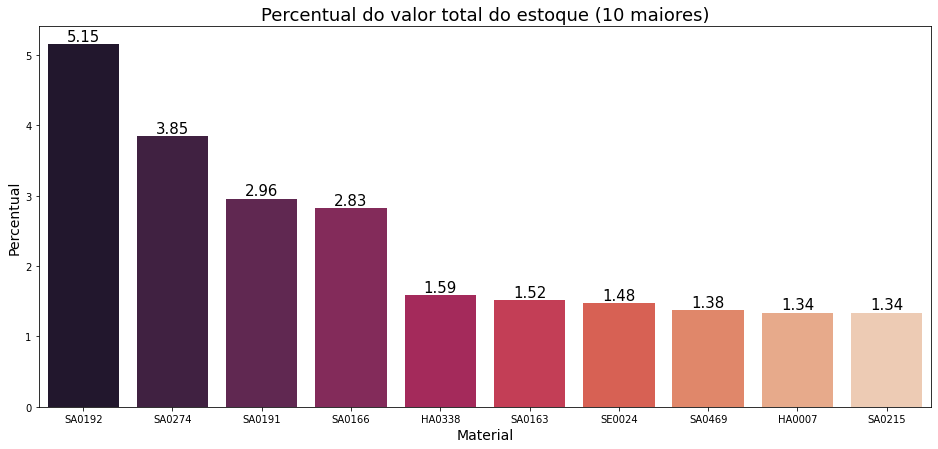

In [179]:
ax = sns.barplot(x='Material', y='percentual', data=grupo_produtos.head(10), palette='rocket')
ax.figure.set_size_inches(16,7)
ax.set_title('Percentual do valor total do estoque (10 maiores)', fontsize=18)
ax.set_xlabel('Material', fontsize=14)
ax.set_ylabel('Percentual', fontsize=14)
ax.bar_label(ax.containers[0], size=15)
ax=ax

#### Valor total de cada classe em milhões de reais

In [180]:
curva = (grupo_produtos.groupby(by='curva')['valor_total'].sum()/1000000).to_frame()
curva['percentual'] = (curva['valor_total'] / curva['valor_total'].sum()*100).round(2)
curva.head()

,valor_total,percentual
curva,,
A,9.262304,19.39
B,14.577734,30.51
C,23.936277,50.10


#### Quantidade de itens de cada classe

In [181]:
grupo_produtos['curva'].value_counts()

C    341
B     30
A      7
Name: curva, dtype: int64

### Análise 2 - Por quantidade em estoque

In [182]:
# Cria um dataframe com a quantidade total de cada item
qtd_estoque = mb52.groupby('Material')['qtd_total'].sum().to_frame().sort_values('qtd_total', ascending=False).round(2)

In [183]:
qtd_estoque['percentual'] = (qtd_estoque['qtd_total'] / qtd_estoque['qtd_total'].sum()*100).round(2)
qtd_estoque['acumulado'] = qtd_estoque['percentual'].cumsum()

In [184]:
qtd_estoque.head()

,qtd_total,percentual,acumulado
Material,,,
SA0274,182141.68,3.68,3.68
SA0192,177104.34,3.58,7.26
SA0166,133912.94,2.71,9.97
SA0191,117754.30,2.38,12.35
SA0163,71960.00,1.45,13.80


In [185]:
qtd_estoque['curva'] = qtd_estoque['acumulado'].apply(lambda x: 'A' if x <= 20 else 'B' if x <= 50 else 'C')

In [186]:
qtd_estoque.head(10)

,qtd_total,percentual,acumulado,curva
Material,,,,
SA0274,182141.68,3.68,3.68,A
SA0192,177104.34,3.58,7.26,A
SA0166,133912.94,2.71,9.97,A
SA0191,117754.30,2.38,12.35,A
SA0163,71960.00,1.45,13.80,A
SE0024,69930.46,1.41,15.21,A
HA0338,69201.96,1.40,16.61,A
SA0469,66002.40,1.33,17.94,A
SA0164,62473.70,1.26,19.20,A


### Unindo as duas curvas em um único dataframe

In [187]:
curva_estoque = qtd_estoque.merge(grupo_produtos, left_on='Material', right_on='Material')

In [188]:
curva_estoque['inicial_item'] = curva_estoque['Material'].str[:2]
curva_estoque['tipo_item'] = curva_estoque['inicial_item'].map(tipo_item)
curva_estoque['tipo_produto'] = curva_estoque['inicial_item'].map(tipo_produto)

In [189]:
curva_estoque.head()

,Material,qtd_total,percentual_x,acumulado,curva_x,valor_total,percentual_y,percentual_acumulado,curva_y,inicial_item,tipo_item,tipo_produto
0,SA0274,182141.68,3.68,3.68,A,1841451.81,3.85,9.00,A,SA,stretch,acabado
1,SA0192,177104.34,3.58,7.26,A,2458207.31,5.15,5.15,A,SA,stretch,acabado
2,SA0166,133912.94,2.71,9.97,A,1353859.51,2.83,14.79,A,SA,stretch,acabado
3,SA0191,117754.30,2.38,12.35,A,1413051.60,2.96,11.96,A,SA,stretch,acabado
4,SA0163,71960.00,1.45,13.80,A,727515.48,1.52,17.90,A,SA,stretch,acabado


In [190]:
curva_estoque.rename(columns={
    'percentual_x':'percentual_qtd',
    'acumulado':'acumulado_qtd',
    'curva_x':'curva_qtd',
    'percentual_y':'percentual_valor',
    'percentual_acumulado':'acumulado_valor',
    'curva_y':'curva_valor',
}, inplace=True)

In [191]:
curva_estoque.to_csv('dados/curva_vlr_qtd.csv', index=False)

In [192]:
curva_estoque.head(15)

,Material,qtd_total,percentual_qtd,acumulado_qtd,curva_qtd,valor_total,percentual_valor,acumulado_valor,curva_valor,inicial_item,tipo_item,tipo_produto
0,SA0274,182141.68,3.68,3.68,A,1841451.81,3.85,9.00,A,SA,stretch,acabado
1,SA0192,177104.34,3.58,7.26,A,2458207.31,5.15,5.15,A,SA,stretch,acabado
2,SA0166,133912.94,2.71,9.97,A,1353859.51,2.83,14.79,A,SA,stretch,acabado
3,SA0191,117754.30,2.38,12.35,A,1413051.60,2.96,11.96,A,SA,stretch,acabado
4,SA0163,71960.00,1.45,13.80,A,727515.48,1.52,17.90,A,SA,stretch,acabado
5,SE0024,69930.46,1.41,15.21,A,706996.74,1.48,19.38,A,SE,stretch,semiacabado
6,HA0338,69201.96,1.40,16.61,A,761221.56,1.59,16.38,A,HA,shrink,acabado
7,SA0469,66002.40,1.33,17.94,A,660024.00,1.38,20.76,B,SA,stretch,acabado
8,SA0164,62473.70,1.26,19.20,A,631609.37,1.32,24.76,B,SA,stretch,acabado
9,SA0528,61109.90,1.23,20.43,B,617820.98,1.29,27.37,B,SA,stretch,acabado


#### Exibir gráfico para demonstrar a curva

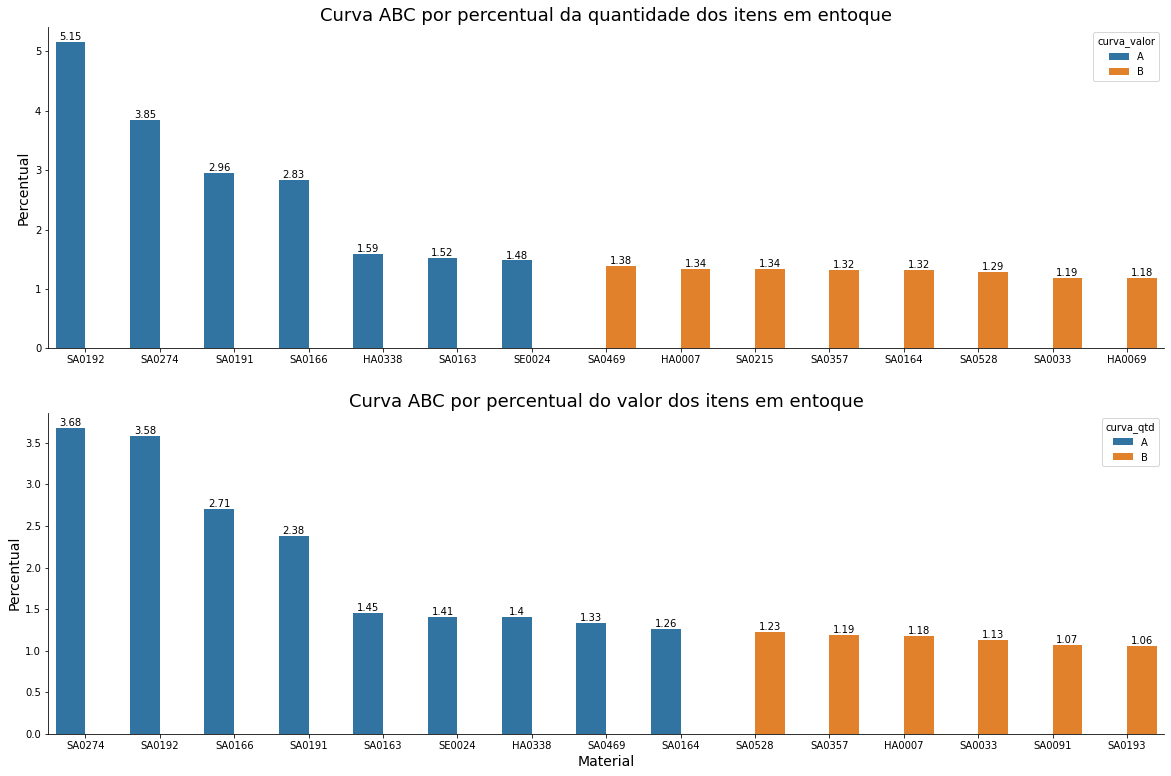

In [193]:
plt.figure(figsize=(20, 13))

# Gráfico 1
ax = plt.subplot(2,1,1)

dados = curva_estoque.sort_values('percentual_valor', ascending=False).head(15)

ax = sns.barplot(x='Material', y='percentual_valor', hue='curva_valor', data=dados)
#x.figure.set_size_inches(18,7)
ax.set_title('Curva ABC por percentual da quantidade dos itens em entoque', fontsize=18)
#ax.bar_label(ax.containers[0], size=12)
ax.set_xlabel(None)
ax.set_ylabel('Percentual', fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
ax.spines[['top','right']].set_visible(False)
ax=ax

# Gráfico 2
ax = plt.subplot(2,1,2)

dados = curva_estoque.sort_values('percentual_qtd', ascending=False).head(15)

ax = sns.barplot(x='Material', y='percentual_qtd', hue='curva_qtd', data=dados)
#ax.figure.set_size_inches(18,7)
ax.set_title('Curva ABC por percentual do valor dos itens em entoque', fontsize=18)
#ax.bar_label(ax.containers[0], size=12)
ax.set_xlabel('Material', fontsize=14)
ax.set_ylabel('Percentual', fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
ax.spines[['top','right']].set_visible(False)
ax=ax

#plt.subplots_adjust(hspace=0.5)


#### Criando o dataframe final com as curvas e os tipos de itens e produtos

In [194]:
curva_combinada = curva_estoque[['Material', 'curva_qtd', 'curva_valor']]

curva_combinada['inicial_item'] = curva_combinada['Material'].str[:2]
curva_combinada['tipo_item'] = curva_combinada['inicial_item'].map(tipo_item)
curva_combinada['tipo_produto'] = curva_combinada['inicial_item'].map(tipo_produto)
curva_combinada.drop(columns=['inicial_item'], inplace=True)

curva_combinada.head()

C:\Users\mathe\AppData\Local\Temp\ipykernel_21512\3029216841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curva_combinada['inicial_item'] = curva_combinada['Material'].str[:2]
C:\Users\mathe\AppData\Local\Temp\ipykernel_21512\3029216841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curva_combinada['tipo_item'] = curva_combinada['inicial_item'].map(tipo_item)
C:\Users\mathe\AppData\Local\Temp\ipykernel_21512\3029216841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Material,curva_qtd,curva_valor,tipo_item,tipo_produto
0,SA0274,A,A,stretch,acabado
1,SA0192,A,A,stretch,acabado
2,SA0166,A,A,stretch,acabado
3,SA0191,A,A,stretch,acabado
4,SA0163,A,A,stretch,acabado


## Exportando o dataframe para CSV

In [195]:
if gravacao == True:
    curva_combinada.to_csv(nova_pasta+'/curva_combinada.csv', sep=',', index=False)
else:
    curva_combinada.to_csv('dados/curva_combinada.csv', sep=',', index=False)